# Imports

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 1. Implementacion de Runge Kutta de orden 4

In [89]:
#h: paso
#n: numero de iteraciones
#t0: t inicial
#y0: valor inicial
#f: la funcion diferencial que depende de t e y
#Devuelve todos los valores de Y (posicion) y de t
def runge_kutta_orden_4(f, y0, t0, n, h):
    tiempos = [t0]
    valores = [y0] # [ [0,0] , [1,3] , ....]

    for i in range(n):
        t_actual = tiempos[-1]
        y_actual = valores[-1]

        k1 = f(t_actual, y_actual)
        k2 = f(t_actual + h/2, y_actual + h*k1/2)
        k3 = f(t_actual + h/2, y_actual + h*k2/2)
        k4 = f(t_actual + h, y_actual + h*k3)

        y_next = y_actual + h * (k1 + 2*k2 + 2*k3 + k4) / 6
        t_next = t_actual + h


        tiempos.append(t_next)
        valores.append(y_next)

    return np.array(tiempos), np.array(valores)

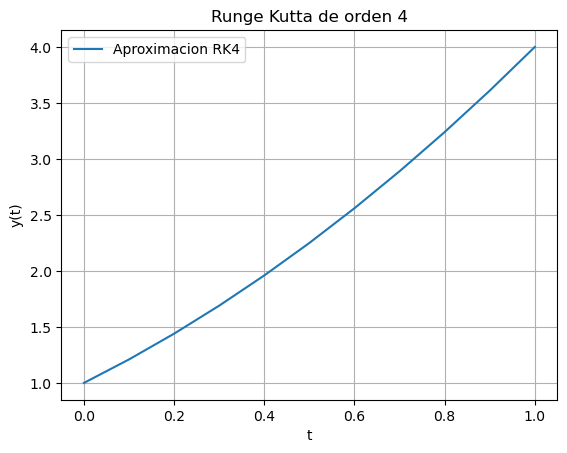

In [90]:
#Ejemplo
def f(t, y):
    return y - t**2 + 1

t0 = 0
y0 = 1
h = 0.1
n = 10

t, y = runge_kutta_orden_4(f, y0, t0, n, h)

plt.xlabel("t")
plt.ylabel("y(t)")
plt.plot(t, y, label='Aproximacion RK4')
plt.title("Runge Kutta de orden 4")
plt.legend()
plt.grid()
plt.show()

# 2. Diseño de trayectorias

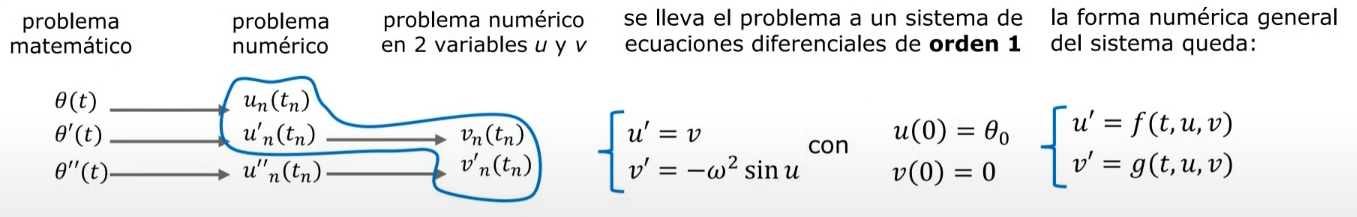

## Valores de aceleracion y radio de la trayectoria en la curva

In [91]:
aceleracion_en_curva = 10
radio = 5

## Funcion difetencial f de la curva

In [ ]:
# Recibe:
#   t: tiempo actual
#   y: es un array donde:
#       la primera pos es el vector de la posicion angular ([pos_angular_x, pos_angular_y]      
#       la primera pos es el vector de la velocidad angular ([vel_angular_x, vel_angular_y]      
#   Devuelve un vector donde:
#       En la primera pos devuelve el vector de la la velocidad angular en t [dtPos_angular_x_dt, dtPos_angular_y_dt]
#       En la segunda pos devuelve el vector la aceleracion angular en t [dtVel_angular_x_dt, dtVel_angular_y_dt]
def f_curva(t, y):
    pos_angular = y[0]  # y[0] es el vector de la posicion angular
    vel_angular = y[1]  # y[1] es el vector de la velocidad
    dtPos_angular_dt = vel_angular  # derivada de la posicion es la velocidad angular
    dtVel_angular_dt = -(aceleracion_en_curva / radio) * np.sin(pos_angular)
    return np.array([dtPos_angular_dt, dtVel_angular_dt])

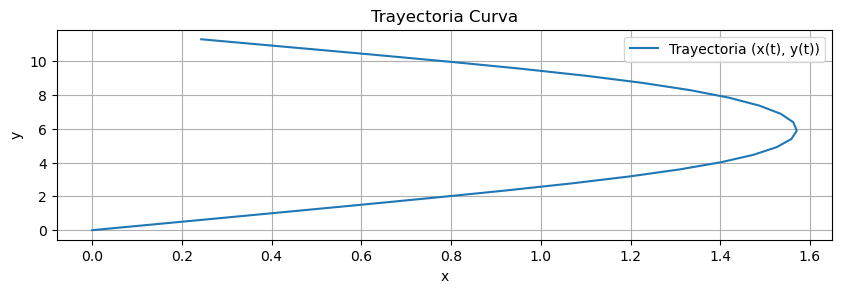

In [121]:
#Ejemplo del RK4 de la funcion de la trayectoria en una curva
t0 = 0
y0 = np.array([[0,0], [2, 5]])  # Inicializa con pos angular 1 y velocidad angular 0
h = 0.1
n = 25

# RK
t, y = runge_kutta_orden_4(f_curva, y0, t0, n, h)

# Graficar los resultados
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(y[:, 0][:, 0], y[:, 0][:, 1], label="Trayectoria (x(t), y(t))")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trayectoria Curva")
plt.legend()
plt.grid(True)

## Valores de la trayectoria recta

In [94]:
m = 800
aceleracion_recta = 5

## Funcion diferencial f de la la trayectoria recta

In [95]:
#Porque F depende de t???
def f_fuerza(t):
    return np.array([2.5,1.2])

In [ ]:
# Recibe:
#   t: tiempo actual
#   y: es un array donde:
#       la primera pos es el vector de la posicion [pos_x, pos_y]      
#       la primera pos es el vector de la velocidad [vel_x, vel_y]      
# Devuelve un vector donde:
#   En la primera pos devuelve el vector de la la velocidad en t [dtPos_x_dt, dtPos_y_dt]
#   En la segunda pos devuelve el vector la aceleracion en t [dtVel_x_dt, dtVel_y_dt]
def f_recto(t, y):
    pos = y[0] #y[0] es el vector de la posicion [pos_x, pos_y]
    vel = y[1] #y[1] es el vector de la velocidad [vel_x, vel_y]
    ac = (f_fuerza(t) / m)
    return np.array([vel, ac])

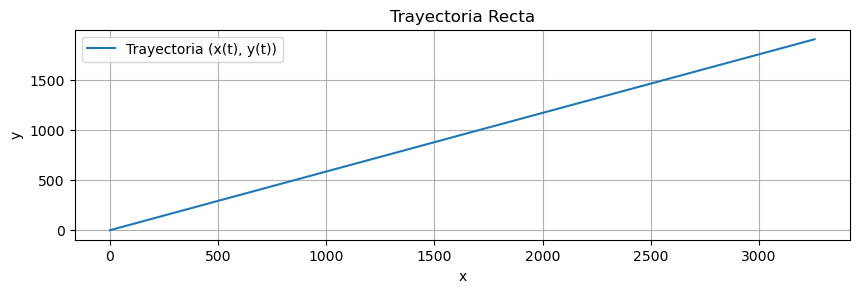

In [119]:
#Ejemplo
t0 = 0
y0 = np.array([[0,0], [20.5, 12]])
h = 0.1
n = 1570

# RK
t, y = runge_kutta_orden_4(f_recto, y0, t0, n, h)

# Graficar los resultados
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(y[:, 0][:, 0], y[:, 0][:, 1], label="Trayectoria (x(t), y(t))")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trayectoria Recta")
plt.legend()
plt.grid(True)